## Visualizing Historical Sea Ice and Climate Trends in the Southern Ocean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas
import folium

In [2]:
climate_df = pd.read_csv("A historical Southern Ocean climate dataset from whaling ships' logbooks.csv", low_memory = False)

whale_df = pd.read_csv("Bjorge_et_al_catchlogbook_whaling_weather_data_1932-63_data_publication.csv")

### Preprocessing data

In [3]:
whale_df = whale_df.drop(columns=[f'Unnamed: {i}' for i in range(17,24)], axis = 1)
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6281 entries, 0 to 6280
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship             6281 non-null   object 
 1   date             6281 non-null   object 
 2   Latitude         6281 non-null   float64
 3   Longitude        6281 non-null   float64
 4   Temp (air)       6133 non-null   float64
 5   Temp (sea)       4950 non-null   float64
 6   mBar             6281 non-null   float64
 7   Weather          6206 non-null   object 
 8   Wind             6266 non-null   object 
 9   Strength (Wind)  6251 non-null   float64
 10  Sea (Waves)      6176 non-null   float64
 11  Ice              6042 non-null   object 
 12  Blue Whales      4288 non-null   float64
 13  Finn Whales      5104 non-null   float64
 14  Humpback Whale   2115 non-null   float64
 15  Sperm Whales     6128 non-null   float64
 16  Sei Whale        1144 non-null   float64
dtypes: float64(12)

In [4]:
climate_df['date'] = pd.to_datetime(
    climate_df[['YR', 'MO', 'DY']].rename(columns={'YR': 'year', 'MO': 'month', 'DY': 'day'}),
    errors='coerce'
)

# Drop columns that have all NA values
climate_df = climate_df.dropna(axis=1, how='all')

# Keep only the columns with more than one unique value
climate_df = climate_df.loc[:, climate_df.nunique() > 1]

In [5]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8617 entries, 0 to 8616
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YR      8617 non-null   int64         
 1   MO      8617 non-null   int64         
 2   DY      8617 non-null   int64         
 3   HR      8617 non-null   int64         
 4   LAT     8617 non-null   float64       
 5   LON     8617 non-null   float64       
 6   ID      8617 non-null   int64         
 7   D       8617 non-null   float64       
 8   W       8310 non-null   float64       
 9   WW      231 non-null    object        
 10  SLP     7881 non-null   float64       
 11  AT      376 non-null    float64       
 12  SST     8254 non-null   float64       
 13  WD      711 non-null    float64       
 14  WH      8016 non-null   float64       
 15  SD      520 non-null    float64       
 16  SH      724 non-null    float64       
 17  LOV     8617 non-null   int64         
 18  date    

In [6]:
## Plot normal temperature

Text(0.5, 1.0, 'Temperature over time')

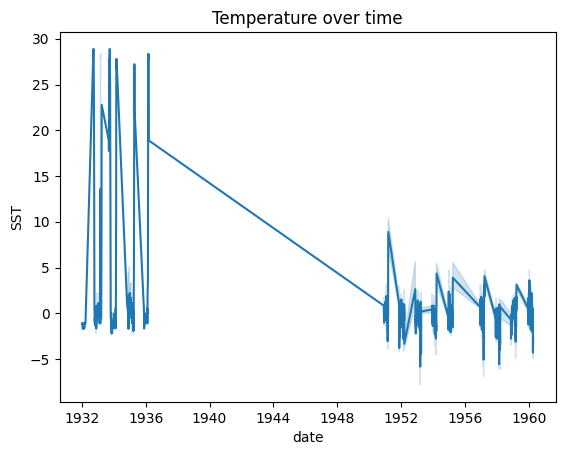

In [7]:
sns.lineplot(data=climate_df, x='date', y='SST')
plt.title('Temperature over time')

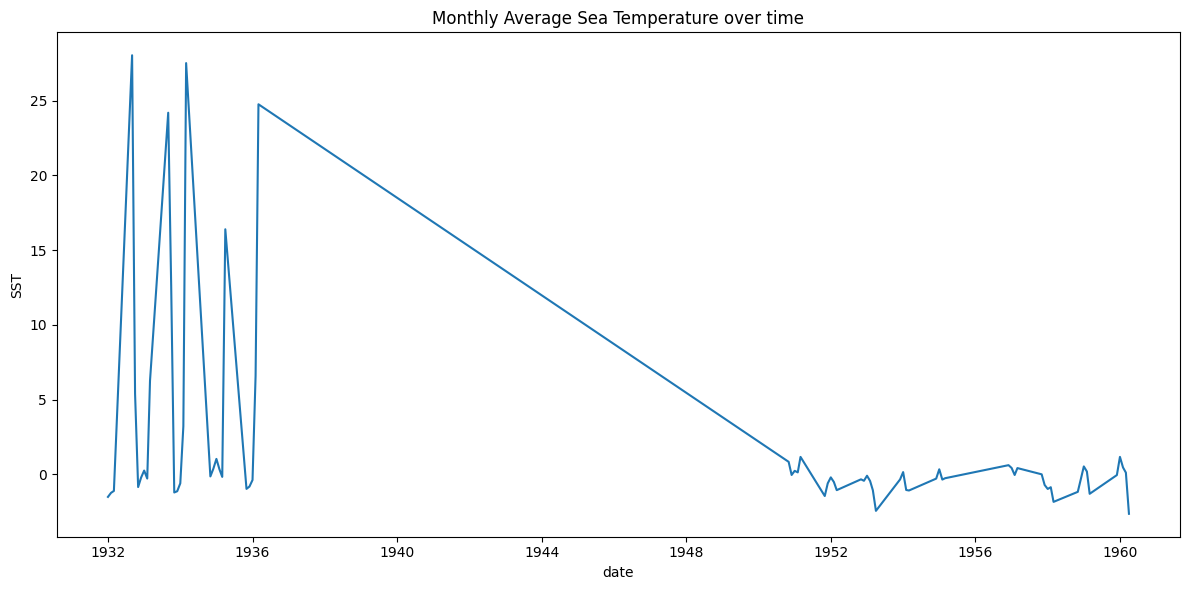

In [8]:


monthly_avg = climate_df.groupby(climate_df['date'].dt.to_period('M')).mean(numeric_only= True).reset_index()
monthly_avg['date'] = monthly_avg['date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=monthly_avg, x='date', y='SST')




# Rotate tick labels if needed
# plt.xticks(rotation=45)

plt.title('Monthly Average Sea Temperature over time')
plt.tight_layout()
plt.show()

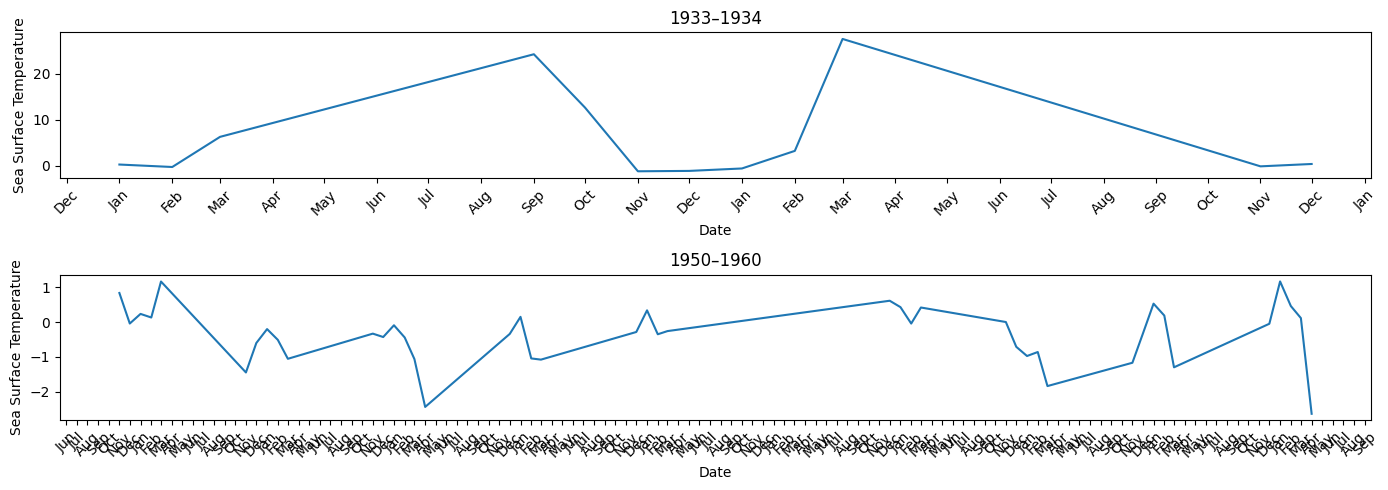

In [9]:
df_1933_1934 = monthly_avg[
    (monthly_avg['date'] >= '1933-01-01') & (monthly_avg['date'] <= '1934-12-31')
]

df_1950_1960 = monthly_avg[
    (monthly_avg['date'] >= '1950-01-01') & (monthly_avg['date'] <= '1960-12-31')
]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 5))  # 1 row, 2 columns
axes.flatten()
# Plot for 1933–1934
sns.lineplot(data=df_1933_1934, x='date', y='SST', ax=axes[0])
axes[0].set_title('1933–1934')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sea Surface Temperature')

# Plot for 1950–1960
sns.lineplot(data=df_1950_1960, x='date', y='SST', ax=axes[1])
axes[1].set_title('1950–1960')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sea Surface Temperature')


import matplotlib.dates as mdates

# For each Axes, configure monthly locators and formatters
for ax in axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator())        # Tick at each month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # Abbreviated month name (Jan, Feb, etc.)
    plt.setp(ax.get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()




In [10]:
import pandas as pd

# Subset for 1933–1934
df_1933_1934 = climate_df[(climate_df['date'] >= '1933-01-01') & (climate_df['date'] <= '1934-12-31')].copy()

# Subset for 1950–1960
df_1950_1960 = climate_df[(climate_df['date'] >= '1950-01-01') & (climate_df['date'] <= '1960-12-31')].copy()


In [11]:
df_1933_1934['month'] = df_1933_1934['date'].dt.month
df_1950_1960['month'] = df_1950_1960['date'].dt.month


In [12]:
monthly_1933_1934 = (
    df_1933_1934
    .groupby('month', as_index=False)['SST']
    .mean()
)
monthly_1933_1934['period'] = '1933–1934'  # Label this period

monthly_1950_1960 = (
    df_1950_1960
    .groupby('month', as_index=False)['SST']
    .mean()
)
monthly_1950_1960['period'] = '1950–1960'  # Label this period


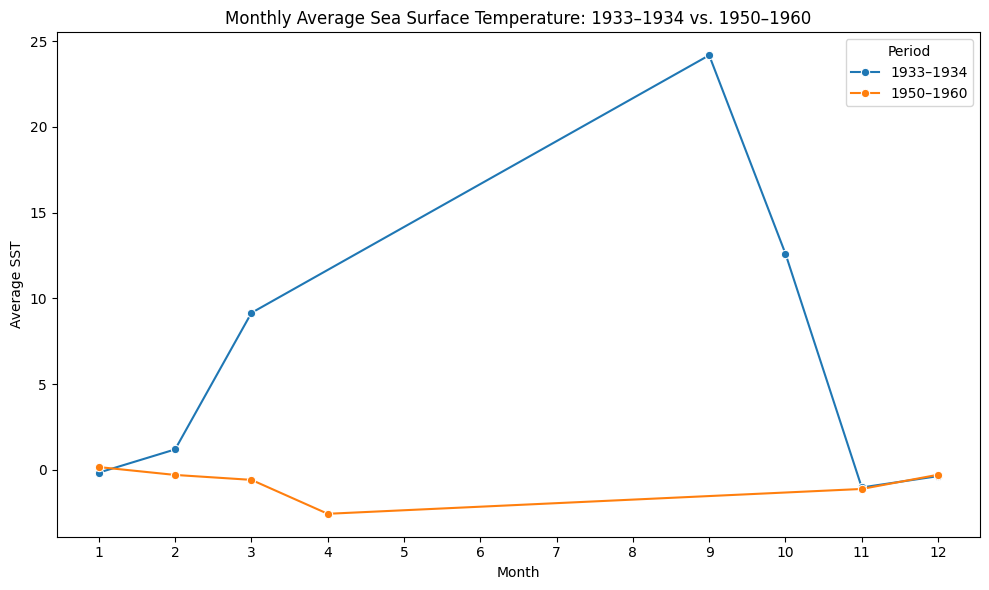

In [13]:
# Concatenate into a single DataFrame
monthly_both = pd.concat([monthly_1933_1934, monthly_1950_1960])

# Plot as a line plot, with month on x-axis and a separate line per period
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_both, x='month', y='SST', hue='period', marker='o')
plt.xticks(range(1, 13))  # Ensure x ticks go from 1 to 12
plt.xlabel('Month')
plt.ylabel('Average SST')
plt.title('Monthly Average Sea Surface Temperature: 1933–1934 vs. 1950–1960')
plt.legend(title='Period')
plt.tight_layout()
plt.show()